In [1]:
import numpy as np
import pandas as pd

### XLM_BIASCORP

In [3]:
xlm_biascorp = pd.read_csv("xlm-r-racismo results.csv")
xlm_biascorp.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source,weighted_bias,true_label,racism_prediction
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB,2.916667,0,[0]
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB,2.500000,0,[0]
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB,2.666667,0,[0]
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB,4.041667,1,[0]
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB,2.619048,0,[0]


In [15]:
len(pred_label)

1

In [33]:
def change(df,pred_label):
    for i in df:
        if i=='[0]':
            pred_label.append(0)
        else:
            pred_label.append(1)
    return pred_label

In [19]:
pred_label=[]
def change(df,pred_label):
    for i in df:
        if i=='[0]':
            pred_label.append(0)
        else:
            pred_label.append(1)
xlm_biascorp['racism_prediction'] = pred_label
xlm_biascorp.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source,weighted_bias,true_label,racism_prediction
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB,2.916667,0,0
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB,2.500000,0,0
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB,2.666667,0,0
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB,4.041667,1,0
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB,2.619048,0,0


Accuracy: 0.5174
F1 Score: 0.3221
Confusion Matrix:
[[17615  5007]
 [16097  5013]]


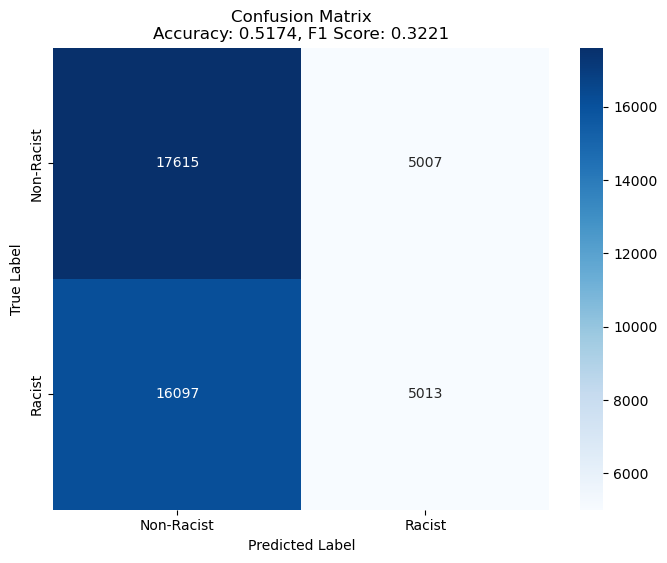

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
precision = precision_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
recall = recall_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
f1 = f1_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
conf_matrix = confusion_matrix(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()



### XLM_KAGGLE

In [41]:
xlm_kaggle = pd.read_csv("xlm_kaggle.csv")
xlm_kaggle.head()

,date,tweet,cleanText,TextBlob Sentiment,prediction
0,6/3/2021,@HyperSnoc @Echo31334604 @im_not_kit Racism h...,hypersnoc echo im_not_kit racism,Neutral,[0]
1,6/3/2021,@manoutdoors4 @AJ_Lady_Liberty @FBIWFO @TheJus...,manoutdoor aj_lady_liberti fbiwfo thejusticede...,Positive,[0]
2,6/3/2021,#TrumpIsNotWell https://t.co/JJl8j4dRK9,trumpisnotwel,Neutral,[0]
3,6/3/2021,"@KateWilliamsme @AnnaBethS4 ðŸš¨ ""Racism is ex...",katewilliamsm annabeth ðÿš racism exempt queen...,Neutral,[0]
4,6/3/2021,@WGNNews â€˜Critical race theoryâ€™ is nothing...,wgnnew critic race theoryâ noth teach hatr big...,Neutral,[0]


In [43]:
prediction = []
xlm_kaggle['prediction'] = change(xlm_kaggle['prediction'],prediction)
xlm_kaggle.head()

,date,tweet,cleanText,TextBlob Sentiment,prediction
0,6/3/2021,@HyperSnoc @Echo31334604 @im_not_kit Racism h...,hypersnoc echo im_not_kit racism,Neutral,0
1,6/3/2021,@manoutdoors4 @AJ_Lady_Liberty @FBIWFO @TheJus...,manoutdoor aj_lady_liberti fbiwfo thejusticede...,Positive,0
2,6/3/2021,#TrumpIsNotWell https://t.co/JJl8j4dRK9,trumpisnotwel,Neutral,0
3,6/3/2021,"@KateWilliamsme @AnnaBethS4 ðŸš¨ ""Racism is ex...",katewilliamsm annabeth ðÿš racism exempt queen...,Neutral,0
4,6/3/2021,@WGNNews â€˜Critical race theoryâ€™ is nothing...,wgnnew critic race theoryâ noth teach hatr big...,Neutral,0


In [45]:
xlm_kaggle['true_label'] = xlm_kaggle['TextBlob Sentiment'].map({"Positive": 0, "Neutral": 0, "Negative": 1})
xlm_kaggle.head()

,date,tweet,cleanText,TextBlob Sentiment,prediction,true_label
0,6/3/2021,@HyperSnoc @Echo31334604 @im_not_kit Racism h...,hypersnoc echo im_not_kit racism,Neutral,0,0
1,6/3/2021,@manoutdoors4 @AJ_Lady_Liberty @FBIWFO @TheJus...,manoutdoor aj_lady_liberti fbiwfo thejusticede...,Positive,0,0
2,6/3/2021,#TrumpIsNotWell https://t.co/JJl8j4dRK9,trumpisnotwel,Neutral,0,0
3,6/3/2021,"@KateWilliamsme @AnnaBethS4 ðŸš¨ ""Racism is ex...",katewilliamsm annabeth ðÿš racism exempt queen...,Neutral,0,0
4,6/3/2021,@WGNNews â€˜Critical race theoryâ€™ is nothing...,wgnnew critic race theoryâ noth teach hatr big...,Neutral,0,0


Accuracy: 0.6597
Precision: 0.3694
Recall: 0.1109
F1 Score: 0.1706
Confusion Matrix:
[[105975  10140]
 [ 47594   5939]]


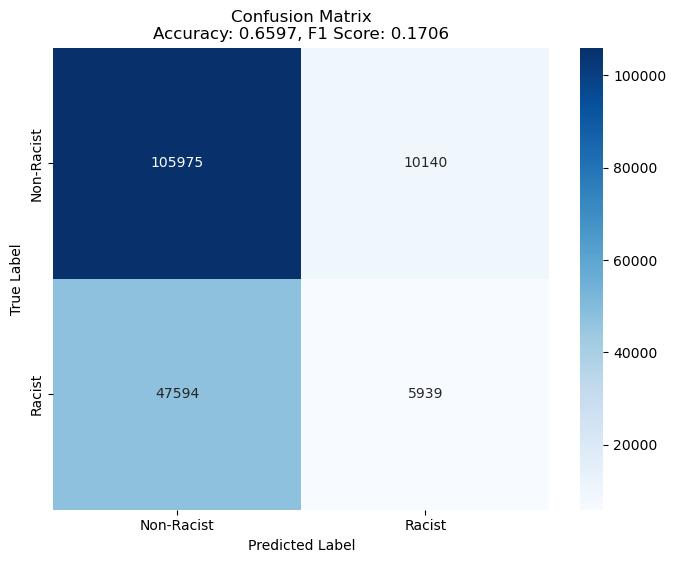

In [47]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
precision = precision_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
recall = recall_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
f1 = f1_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
conf_matrix = confusion_matrix(xlm_kaggle['true_label'], xlm_kaggle['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

### XLM_SAKREN

In [52]:
xlm_sakren = pd.read_csv('xlm_sakren.csv')
xlm_sakren.head()

,index,id,Text,Annotation,oh_label,prediction
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,[1]
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,[0]
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,[1]
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,[0]
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,[0]


In [54]:
prediction = []
xlm_sakren['prediction'] = change(xlm_sakren['prediction'],prediction)
xlm_sakren.head()

Accuracy: 0.8535
Precision: 0.4984
Recall: 0.3157
F1 Score: 0.3866
Confusion Matrix:
[[10875   626]
 [ 1348   622]]


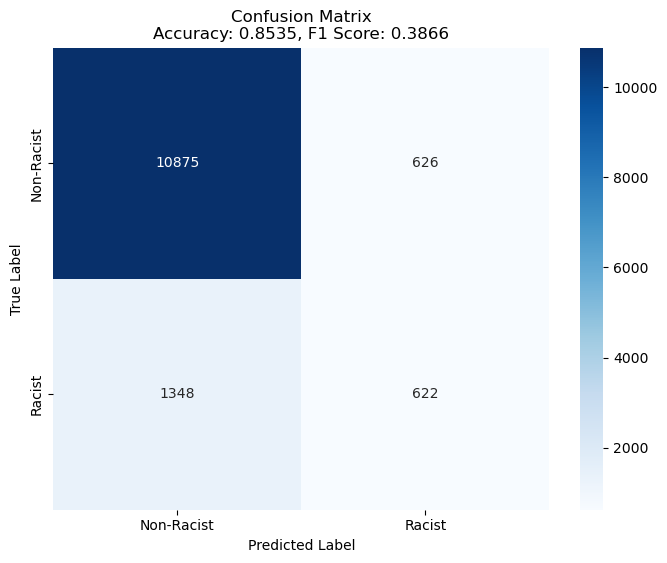

In [58]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
precision = precision_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
recall = recall_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
f1 = f1_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
conf_matrix = confusion_matrix(xlm_sakren['oh_label'], xlm_sakren['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

### XLM_TWITTER

In [64]:
xlm_twitter = pd.read_csv('xlm_twitter.csv')
xlm_twitter.head()

,label,tweet,prediction
0,0,@user when a father is dysfunctional and is so...,[0]
1,0,@user @user thanks for #lyft credit i can't us...,[0]
2,0,bihday your majesty,[0]
3,0,#model i love u take with u all the time in ...,[0]
4,0,factsguide: society now #motivation,[0]


In [66]:
prediction = []
xlm_twitter['prediction'] = change(xlm_twitter['prediction'],prediction)
xlm_twitter.head()

,label,tweet,prediction
0,0,@user when a father is dysfunctional and is so...,0
1,0,@user @user thanks for #lyft credit i can't us...,0
2,0,bihday your majesty,0
3,0,#model i love u take with u all the time in ...,0
4,0,factsguide: society now #motivation,0


Accuracy: 0.9009
Precision: 0.1430
Recall: 0.0825
F1 Score: 0.1046
Confusion Matrix:
[[28611  1109]
 [ 2057   185]]


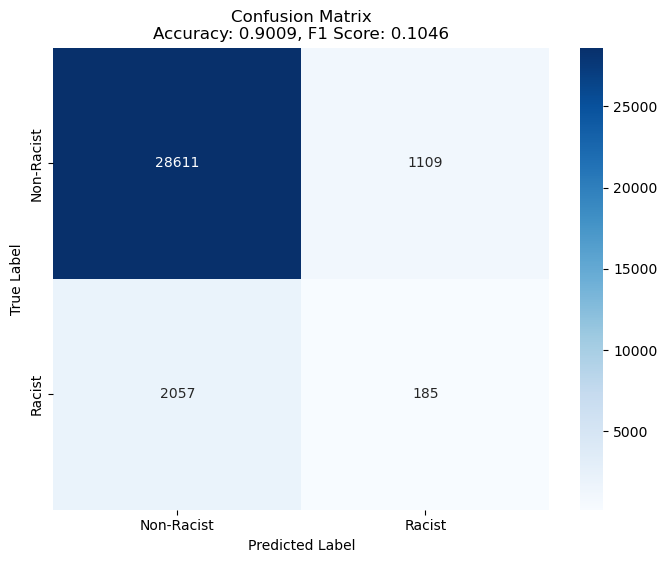

In [68]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_twitter['label'], xlm_twitter['prediction'])
precision = precision_score(xlm_twitter['label'], xlm_twitter['prediction'])
recall = recall_score(xlm_twitter['label'], xlm_twitter['prediction'])
f1 = f1_score(xlm_twitter['label'], xlm_twitter['prediction'])
conf_matrix = confusion_matrix(xlm_twitter['label'], xlm_twitter['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

### ROBERTA_BIASCORP

In [77]:
roberta_bias = pd.read_csv('roberta_results.csv')
roberta_bias.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source,weighted_bias,true_label,troberta_prediction
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB,2.916667,0,NOT-HATE
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB,2.500000,0,NOT-HATE
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB,2.666667,0,NOT-HATE
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB,4.041667,1,NOT-HATE
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB,2.619048,0,NOT-HATE


In [79]:
roberta_bias['troberta_prediction'] = roberta_bias['troberta_prediction'].map({'NOT-HATE':0,'HATE':1})

In [93]:
roberta_bias['true_label'].value_counts()

true_label
0    22622
1    21110
Name: count, dtype: int64

Accuracy: 0.5193
F1 Score: 0.1881
Confusion Matrix:
[[20273  2349]
 [18675  2435]]


AttributeError: QuadMesh.set() got an unexpected keyword argument 'xticktrue_labels'

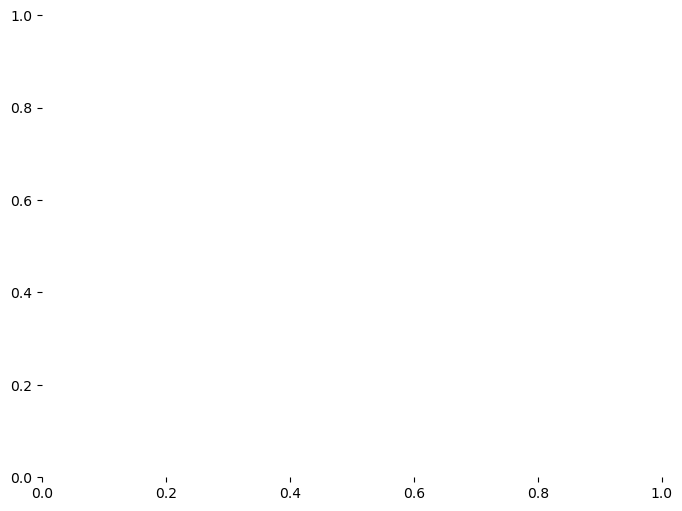

In [83]:
# Calculate Metrics only
accuracy = accuracy_score(roberta_bias['true_label'], roberta_bias['troberta_prediction'])
f1 = f1_score(roberta_bias['true_label'], roberta_bias['troberta_prediction'])
conf_matrix = confusion_matrix(roberta_bias['true_label'], roberta_bias['troberta_prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticktrue_labels=["Non-Racist", "Racist"], yticktrue_labels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xtrue_label("Predicted true_label")
ax.set_ytrue_label("True true_label")
plt.show()